In [2]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
!pip install gTTS

In [ ]:
from gtts import gTTS
from IPython.display import Audio

In [1]:
!pip install opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.7 MB/s 
     |████████████████████████████████| 30.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder1=r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Detection_of_drivable_road/Positive"
folder2=r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Detection_of_drivable_road/Negative"

# **Function for standardization**

In [1]:
def standard(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    ans=[]
    for i in data:
        s = (i-mean)/std_dev
        ans.append(s)
    return ans


```

# **Image** **Preprocessing**

In [ ]:
i=0
for filename in os.listdir(folder1):
    
    path=os.path.join(folder1,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

    #Histogram Equalization
    img3 = cv2.equalizeHist(img2)
    
    fname = r'/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Positive/' + str(i) + '.jpg'
    cv2.imwrite(fname, img3)
    i+=1

In [ ]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

    img3 = cv2.equalizeHist(img2)
    
    fname = r'/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Negative/' + str(i) + '.jpg'
    cv2.imwrite(fname, img3)
    i+=1

In [ ]:
folder3 = r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Positive"
folder4 = r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Negative"

# **Feature Extraction using SIFT**

In [ ]:
i=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    #descriptors = normal(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Drivable.csv', mode='a', header=False,index=False)

    if i>=2000:
        break

descriptor shape  0  :  (925, 128)
descriptor shape  1  :  (887, 128)
descriptor shape  2  :  (900, 128)
descriptor shape  3  :  (980, 128)
descriptor shape  4  :  (998, 128)
descriptor shape  5  :  (1211, 128)
descriptor shape  6  :  (1295, 128)
descriptor shape  7  :  (806, 128)
descriptor shape  8  :  (1048, 128)
descriptor shape  9  :  (966, 128)
descriptor shape  10  :  (1318, 128)
descriptor shape  11  :  (674, 128)
descriptor shape  12  :  (870, 128)
descriptor shape  13  :  (778, 128)
descriptor shape  14  :  (955, 128)
descriptor shape  15  :  (828, 128)
descriptor shape  16  :  (764, 128)
descriptor shape  17  :  (917, 128)
descriptor shape  18  :  (886, 128)
descriptor shape  19  :  (1076, 128)
descriptor shape  20  :  (1041, 128)
descriptor shape  21  :  (952, 128)
descriptor shape  22  :  (1045, 128)
descriptor shape  23  :  (852, 128)
descriptor shape  24  :  (712, 128)
descriptor shape  25  :  (854, 128)
descriptor shape  26  :  (896, 128)
descriptor shape  27  :  (847, 

In [ ]:
data1= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Drivable.csv',header=None,dtype='uint8')
data1=data1.astype(np.uint8)
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,1,13,37,26,8,44,7,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,7,10,0,0,...,6,26,16,19,23,14,5,3,23,59
2,12,14,20,114,29,0,0,3,114,114,...,19,12,11,18,40,35,73,14,3,7
3,0,0,0,0,0,0,0,0,36,22,...,6,13,116,55,32,21,10,7,15,66
4,14,8,1,16,68,14,59,60,109,38,...,69,45,65,15,4,2,4,11,42,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072895,4,5,47,102,26,10,10,24,13,14,...,16,33,2,3,1,7,124,5,0,1
2072896,0,0,0,0,0,3,21,2,14,5,...,50,23,26,30,36,12,10,13,23,59
2072897,5,0,0,5,26,5,2,5,7,0,...,6,13,52,32,11,61,127,38,2,5
2072898,0,0,0,0,0,0,0,0,8,1,...,34,49,74,122,34,14,28,13,27,13


In [ ]:
i=0
for filename in os.listdir(folder4):
    
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    # descriptors = normal(descriptors)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Non_Drivable.csv', mode='a', header=False,index=False)

    if i>=2000:
        break

descriptor shape  0  :  (1462, 128)
descriptor shape  1  :  (925, 128)
descriptor shape  2  :  (1073, 128)
descriptor shape  3  :  (1232, 128)
descriptor shape  4  :  (1283, 128)
descriptor shape  5  :  (1267, 128)
descriptor shape  6  :  (876, 128)
descriptor shape  7  :  (1354, 128)
descriptor shape  8  :  (1276, 128)
descriptor shape  9  :  (1173, 128)
descriptor shape  10  :  (1369, 128)
descriptor shape  11  :  (1074, 128)
descriptor shape  12  :  (1377, 128)
descriptor shape  13  :  (1382, 128)
descriptor shape  14  :  (856, 128)
descriptor shape  15  :  (1157, 128)
descriptor shape  16  :  (1600, 128)
descriptor shape  17  :  (1315, 128)
descriptor shape  18  :  (1309, 128)
descriptor shape  19  :  (1128, 128)
descriptor shape  20  :  (1045, 128)
descriptor shape  21  :  (1182, 128)
descriptor shape  22  :  (1163, 128)
descriptor shape  23  :  (1506, 128)
descriptor shape  24  :  (1413, 128)
descriptor shape  25  :  (1122, 128)
descriptor shape  26  :  (1038, 128)
descriptor sha

In [ ]:
data2= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Non_Drivable.csv',header=None,dtype ='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,30,20,8,33,21,54,29,32,39,15,...,2,2,0,0,0,0,0,0,0,0
1,26,14,14,22,77,57,5,4,110,49,...,10,4,3,13,6,0,1,1,0,1
2,28,29,73,79,45,4,1,5,49,54,...,0,1,14,6,1,2,4,0,0,2
3,4,0,0,2,14,6,1,2,65,0,...,37,22,45,4,1,5,28,29,73,78
4,0,0,0,0,0,0,0,0,4,0,...,6,5,67,47,20,14,25,40,11,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530745,22,33,7,4,79,64,8,1,1,0,...,6,1,0,5,4,0,0,0,0,0
2530746,0,0,0,0,0,0,0,0,0,9,...,15,25,4,2,4,80,93,30,5,6
2530747,0,0,0,0,0,0,0,0,1,0,...,109,27,6,9,32,9,6,47,91,98
2530748,1,5,27,53,81,84,21,13,2,6,...,3,1,2,9,101,44,18,10,2,1


In [ ]:
SIFT_data=data1.append(data2)

In [ ]:
csv_data=SIFT_data.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Final.csv', mode='a', header=False,index=False)

In [ ]:
SIFT_data = pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Final.csv',header=None)

In [ ]:
SIFT_data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,1,13,37,26,8,44,7,...,0,0,0,0,0,0,0,0,0,0
1,5,1,0,0,0,0,7,10,0,0,...,6,26,16,19,23,14,5,3,23,59
2,12,14,20,114,29,0,0,3,114,114,...,19,12,11,18,40,35,73,14,3,7
3,0,0,0,0,0,0,0,0,36,22,...,6,13,116,55,32,21,10,7,15,66
4,14,8,1,16,68,14,59,60,109,38,...,69,45,65,15,4,2,4,11,42,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603645,22,33,7,4,79,64,8,1,1,0,...,6,1,0,5,4,0,0,0,0,0
4603646,0,0,0,0,0,0,0,0,0,9,...,15,25,4,2,4,80,93,30,5,6
4603647,0,0,0,0,0,0,0,0,1,0,...,109,27,6,9,32,9,6,47,91,98
4603648,1,5,27,53,81,84,21,13,2,6,...,3,1,2,9,101,44,18,10,2,1


# **Feature Extraction using BRISK**

In [ ]:
i=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise brisk descriptor
    brisk = cv2.BRISK_create()
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    
    #descriptors = normal(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Drivable.csv', mode='a', header=False,index=False)

    if i>=2000:
        break

descriptor shape  0  :  (3103, 64)
descriptor shape  1  :  (2704, 64)
descriptor shape  2  :  (3260, 64)
descriptor shape  3  :  (3248, 64)
descriptor shape  4  :  (2193, 64)
descriptor shape  5  :  (2662, 64)
descriptor shape  6  :  (2750, 64)
descriptor shape  7  :  (2595, 64)
descriptor shape  8  :  (2301, 64)
descriptor shape  9  :  (2948, 64)
descriptor shape  10  :  (3075, 64)
descriptor shape  11  :  (2169, 64)
descriptor shape  12  :  (2851, 64)
descriptor shape  13  :  (2901, 64)
descriptor shape  14  :  (2250, 64)
descriptor shape  15  :  (2689, 64)
descriptor shape  16  :  (1806, 64)
descriptor shape  17  :  (1920, 64)
descriptor shape  18  :  (2822, 64)
descriptor shape  19  :  (3233, 64)
descriptor shape  20  :  (3264, 64)
descriptor shape  21  :  (2781, 64)
descriptor shape  22  :  (3189, 64)
descriptor shape  23  :  (2948, 64)
descriptor shape  24  :  (2503, 64)
descriptor shape  25  :  (2601, 64)
descriptor shape  26  :  (2946, 64)
descriptor shape  27  :  (2281, 64)
de

In [ ]:
data3= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Drivable.csv',header=None,dtype='uint8')
data3=data3.astype(np.uint8)
data3

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,32,253,159,66,65,249,119,0,128,159,...,95,15,144,2,0,232,127,194,215,82
1,0,255,31,192,248,153,51,0,128,255,...,223,15,17,0,0,250,40,130,243,83
2,132,123,207,131,128,208,123,20,255,136,...,34,34,249,191,254,47,217,30,143,12
3,128,59,223,239,194,0,0,0,128,128,...,94,12,0,170,215,111,19,0,0,0
4,180,72,219,111,7,0,0,107,255,0,...,255,243,249,254,97,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232692,4,122,223,227,225,193,119,4,4,158,...,253,15,1,80,233,255,255,8,16,176
5232693,176,123,199,233,224,223,1,0,0,0,...,253,191,1,104,245,58,30,12,0,0
5232694,180,89,192,15,100,213,42,127,11,254,...,255,245,47,252,255,55,26,14,0,0
5232695,180,59,247,239,96,192,0,0,0,0,...,68,13,2,0,193,37,18,0,0,0


In [ ]:
i=0
for filename in os.listdir(folder4):
    
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    brisk = cv2.BRISK_create()
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    # descriptors = normal(descriptors)

    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Non_Drivable.csv', mode='a', header=False,index=False)

    if i>=2000:
        break

descriptor shape  0  :  (2468, 64)
descriptor shape  1  :  (412, 64)
descriptor shape  2  :  (1123, 64)
descriptor shape  3  :  (2215, 64)
descriptor shape  4  :  (1493, 64)
descriptor shape  5  :  (2499, 64)
descriptor shape  6  :  (2057, 64)
descriptor shape  7  :  (1782, 64)
descriptor shape  8  :  (898, 64)
descriptor shape  9  :  (1738, 64)
descriptor shape  10  :  (2066, 64)
descriptor shape  11  :  (2096, 64)
descriptor shape  12  :  (2406, 64)
descriptor shape  13  :  (398, 64)
descriptor shape  14  :  (1766, 64)
descriptor shape  15  :  (2117, 64)
descriptor shape  16  :  (1393, 64)
descriptor shape  17  :  (2012, 64)
descriptor shape  18  :  (1587, 64)
descriptor shape  19  :  (2062, 64)
descriptor shape  20  :  (2153, 64)
descriptor shape  21  :  (2062, 64)
descriptor shape  22  :  (1605, 64)
descriptor shape  23  :  (1616, 64)
descriptor shape  24  :  (1879, 64)
descriptor shape  25  :  (1665, 64)
descriptor shape  26  :  (2122, 64)
descriptor shape  27  :  (1803, 64)
descr

In [ ]:
data4= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Non_Drivable.csv',header=None,dtype ='uint8')
data4=data4.astype(np.uint8)
data4

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,224,59,198,237,230,214,125,2,0,0,...,216,92,6,72,133,222,119,8,25,0
1,188,217,255,111,33,0,0,0,0,194,...,5,245,255,107,96,0,0,0,0,0
2,180,123,193,251,111,4,0,65,231,66,...,38,240,62,197,65,0,0,0,0,0
3,4,96,223,231,239,223,7,95,28,126,...,3,176,62,205,67,0,0,0,112,0
4,160,123,199,9,0,128,97,32,32,0,...,183,245,32,8,230,1,82,192,76,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261846,180,121,223,0,32,16,32,0,0,128,...,255,243,255,93,4,130,127,141,29,0
5261847,128,123,207,227,9,128,65,0,0,0,...,247,83,249,254,255,54,0,0,0,0
5261848,176,251,223,227,225,0,0,0,0,0,...,255,15,0,236,65,0,0,0,0,0
5261849,4,106,221,15,0,0,96,112,228,0,...,11,3,209,190,79,4,2,233,48,32


In [ ]:
BRISK_data=data3.append(data4)

In [ ]:
csv_data=BRISK_data.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Final.csv', mode='a', header=False,index=False)

In [ ]:
BRISK_data= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Final.csv',header=None,dtype='uint8')

In [ ]:
BRISK_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,32,253,159,66,65,249,119,0,128,159,...,95,15,144,2,0,232,127,194,215,82
1,0,255,31,192,248,153,51,0,128,255,...,223,15,17,0,0,250,40,130,243,83
2,132,123,207,131,128,208,123,20,255,136,...,34,34,249,191,254,47,217,30,143,12
3,128,59,223,239,194,0,0,0,128,128,...,94,12,0,170,215,111,19,0,0,0
4,180,72,219,111,7,0,0,107,255,0,...,255,243,249,254,97,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494543,180,121,223,0,32,16,32,0,0,128,...,255,243,255,93,4,130,127,141,29,0
10494544,128,123,207,227,9,128,65,0,0,0,...,247,83,249,254,255,54,0,0,0,0
10494545,176,251,223,227,225,0,0,0,0,0,...,255,15,0,236,65,0,0,0,0,0
10494546,4,106,221,15,0,0,96,112,228,0,...,11,3,209,190,79,4,2,233,48,32


# **Elbow Method for SIFT**

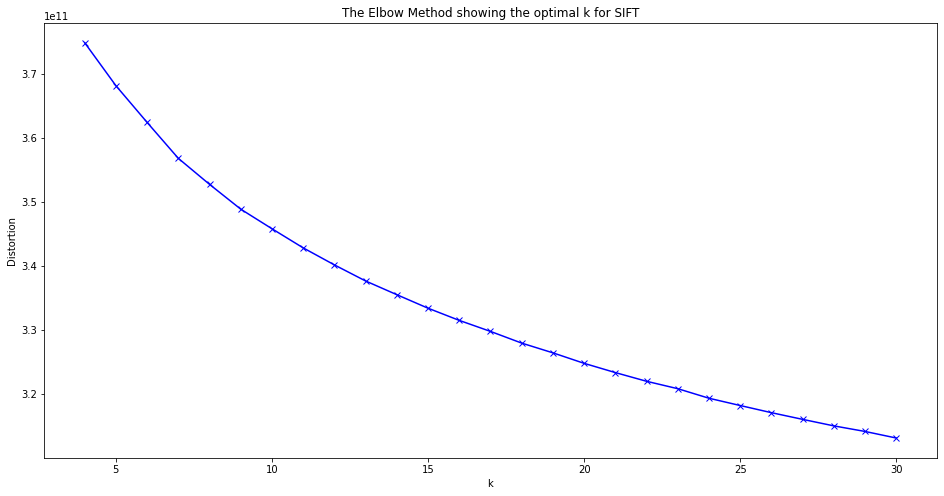

In [ ]:
SIFT_final_dist = []
K = range(4,31)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(SIFT_data)
    SIFT_final_dist.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, SIFT_final_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for SIFT')
plt.show()

# **Elbow method for BRISK**

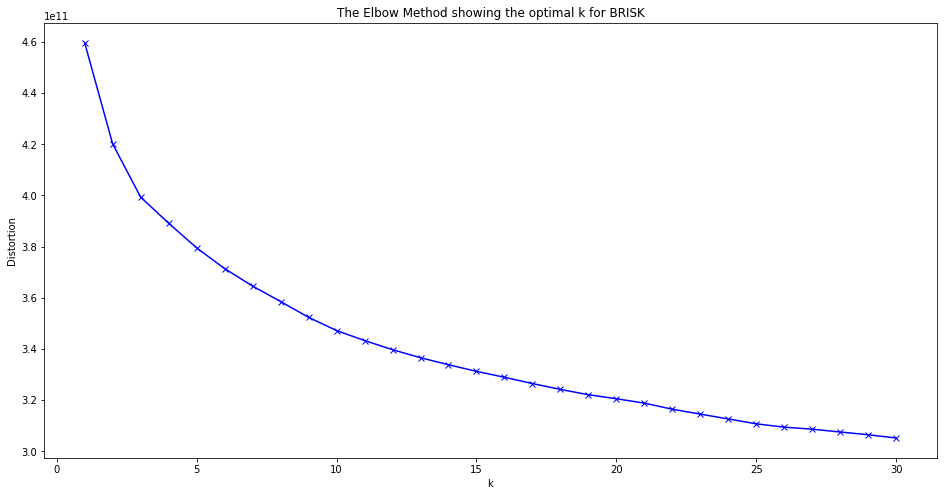

In [ ]:
BRISK_final_dist = []
K = range(1,31)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(BRISK_data)
    BRISK_final_dist.append(kmeanModel.inertia_)

BRISK_final_K = range(1,31)
plt.figure(figsize=(16,8))
plt.plot(BRISK_final_K, BRISK_final_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k for BRISK')
plt.show()

# **K-means Clustering for SIFT**

In [ ]:
SIFT_data= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/Final/SIFT_Final.csv',header=None,dtype='uint8')
SIFT_data=SIFT_data.astype(np.uint8)


In [ ]:
SIFT_kmeans = KMeans(n_clusters=23)
SIFT_kmeans.fit(SIFT_data)

# **K means Clustering for BRISK**

In [ ]:
BRISK_data= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/Final/BRISK_Final.csv',header=None,dtype='uint8')
BRISK_data=BRISK_data.astype(np.uint8)

In [102]:
BRISK_kmeans = KMeans(n_clusters=25)
BRISK_kmeans.fit(BRISK_data)

KMeans(n_clusters=25)


# **Saving the models**

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_SIFT_Model.sav'
pickle.dump(SIFT_kmeans, open(filename, 'wb'))

In [ ]:
# save the model to disk
filename = r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_BRISK_Model.sav'
pickle.dump(BRISK_kmeans, open(filename, 'wb'))

# **Opening models with pickle**

In [ ]:
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_SIFT_Model.sav", "rb") as input_file:
    SIFT_kmeans = pickle.load(input_file)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_BRISK_Model.sav", "rb") as input_file:
    BRISK_kmeans = pickle.load(input_file)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


# **Creating Histogram for the SIFT trained k-means labels.**

In [ ]:
hist=np.histogram(SIFT_kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
print('histogram of trained kmeans')
print(hist,"\n")
#hist1 = normal(hist[0])
#print(hist1,"\n")

histogram of trained kmeans
(array([245215, 109694, 166897, 210349, 245687, 182100, 209744, 238489,
       243848, 229552, 138192, 210281, 191528, 229471, 114614, 158458,
       211179, 191727, 205271, 260180, 214514, 152655, 244005]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])) 



# **Creating Histogram for BRISK trained k means labels**

In [ ]:
hist=np.histogram(BRISK_kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
print('histogram of trained kmeans')
print(hist,"\n")
#hist1 = normal(hist[0])
#print(hist1,"\n")

histogram of trained kmeans
(array([427086, 432149, 416329, 431206, 425794, 422193, 412312, 457262,
       402238, 436482, 453720, 394889, 441366, 430051, 479031, 462731,
       383226, 454114, 213577, 433724, 468268, 456358, 380529, 419118,
       360795]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])) 



In [ ]:
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_SIFT_Model.sav", "rb") as input_file:
    SIFT_kmeans = pickle.load(input_file)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [ ]:
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_BRISK_Model.sav", "rb") as input_file:
    BRISK_kmeans = pickle.load(input_file)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


# **Making Prediction using SIFT k-means model**

In [ ]:
#performing kmeans prediction of the entire Drivable road dataset with the pretrained SIFT kmeans model

#initialising i=0; as its the first class
i=0
data=[]
k=0

for filename in os.listdir(folder3):
    #path
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.xfeatures2d.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=SIFT_kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2000:break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
#Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Final_DR.csv', mode='a',header=False,index=False)

In [ ]:
#performing kmeans prediction of the entire Non Drivable road dataset with the pretrained SIFT kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder4):
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    resize=(280,430)
    img=cv2.resize(a,resize)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
      array_double = np.zeros((1,128))
    
    a=SIFT_kmeans.predict(array_double)
    
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    if len(keypoints) == 0:
      for j in range(25):
        hist[0][j] = 0
      data.append(hist[0])
    else:
      data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2000:
      break

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
#Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Final_NDR.csv', mode='a',header=False,index=False)


# **Displaying SIFT Kmeans predicted data**

In [ ]:
print("Drivable")
dat1= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Final_DR.csv',header=None)
print(dat1)

Drivable
            0         1         2         3         4         5         6   \
0     0.070270  0.041081  0.052973  0.043243  0.030270  0.007568  0.014054   
1     0.069899  0.041714  0.037204  0.050733  0.052988  0.016911  0.030440   
2     0.066667  0.038889  0.053333  0.045556  0.047778  0.004444  0.004444   
3     0.087755  0.012245  0.030612  0.050000  0.060204  0.011224  0.011224   
4     0.042084  0.030060  0.039078  0.041082  0.056112  0.034068  0.053106   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.063768  0.034783  0.033816  0.053140  0.048309  0.004831  0.016425   
1996  0.034916  0.040503  0.054469  0.062849  0.060056  0.009777  0.026536   
1997  0.076923  0.039161  0.036364  0.034965  0.054545  0.022378  0.029371   
1998  0.035857  0.025232  0.030544  0.034529  0.042497  0.070385  0.047809   
1999  0.085598  0.027174  0.031250  0.033967  0.089674  0.019022  0.033967   

            7         8         9   ...        13     

In [ ]:
print("Non-Drivable")
dat2= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_Final_NDR.csv',header=None)
print(dat2)

Non-Drivable
            0         1         2         3         4         5         6   \
0     0.043092  0.034884  0.032148  0.051984  0.070451  0.038304  0.059508   
1     0.027027  0.015135  0.023784  0.041081  0.059459  0.087568  0.090811   
2     0.047530  0.030755  0.037279  0.048462  0.049394  0.031687  0.054054   
3     0.043831  0.018669  0.037338  0.037338  0.077922  0.040584  0.064935   
4     0.038971  0.028059  0.035074  0.041309  0.064692  0.047545  0.060795   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.046132  0.022711  0.044713  0.043293  0.046842  0.070263  0.063165   
1996  0.022760  0.014936  0.026316  0.049075  0.053343  0.047653  0.086060   
1997  0.038853  0.029602  0.036078  0.047179  0.068455  0.061980  0.053654   
1998  0.031568  0.032587  0.030550  0.031568  0.042770  0.058045  0.077393   
1999  0.051402  0.020694  0.026035  0.044059  0.064085  0.067423  0.061415   

            7         8         9   ...        13 

In [ ]:
#appending All classes into 1 csv file

Y=dat1.append(dat2)

In [ ]:
csv_data=Y.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_FinalFV.csv', mode='a',header=False,index=False)

In [ ]:
Y = pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/SIFT_FinalFV.csv',header=None)
Y

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.070270,0.041081,0.052973,0.043243,0.030270,0.007568,0.014054,0.059459,0.098378,0.050811,...,0.057297,0.008649,0.038919,0.050811,0.031351,0.009730,0.056216,0.052973,0.036757,0.082162
1,0.069899,0.041714,0.037204,0.050733,0.052988,0.016911,0.030440,0.052988,0.057497,0.049605,...,0.060879,0.011274,0.032694,0.050733,0.033822,0.037204,0.047351,0.060879,0.028185,0.062007
2,0.066667,0.038889,0.053333,0.045556,0.047778,0.004444,0.004444,0.055556,0.081111,0.056667,...,0.075556,0.001111,0.060000,0.071111,0.022222,0.003333,0.055556,0.064444,0.023333,0.078889
3,0.087755,0.012245,0.030612,0.050000,0.060204,0.011224,0.011224,0.034694,0.080612,0.059184,...,0.075510,0.008163,0.043878,0.048980,0.027551,0.012245,0.075510,0.062245,0.033673,0.074490
4,0.042084,0.030060,0.039078,0.041082,0.056112,0.034068,0.053106,0.056112,0.048096,0.049098,...,0.042084,0.017034,0.034068,0.044088,0.048096,0.048096,0.061122,0.048096,0.038076,0.056112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.046132,0.022711,0.044713,0.043293,0.046842,0.070263,0.063165,0.051810,0.037615,0.037615,...,0.026969,0.038325,0.034067,0.027679,0.041164,0.078779,0.051100,0.046842,0.036906,0.029099
3996,0.022760,0.014936,0.026316,0.049075,0.053343,0.047653,0.086060,0.053343,0.037696,0.045519,...,0.036984,0.037696,0.024893,0.038407,0.051209,0.044097,0.049075,0.040541,0.049787,0.037696
3997,0.038853,0.029602,0.036078,0.047179,0.068455,0.061980,0.053654,0.060130,0.031452,0.037003,...,0.030527,0.024977,0.033302,0.035153,0.042553,0.067530,0.049954,0.044403,0.043478,0.028677
3998,0.031568,0.032587,0.030550,0.031568,0.042770,0.058045,0.077393,0.060081,0.030550,0.049898,...,0.049898,0.042770,0.037678,0.032587,0.040733,0.066191,0.047862,0.030550,0.036660,0.042770


# **Making prediction using BRISK k-means model**

In [ ]:
#performing kmeans prediction of the entire Drivable road dataset with the pretrained BRISK kmeans model

#initialising i=0; as its the first class
i=0
data=[]
k=0

for filename in os.listdir(folder3):
    #path
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #gray image
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    brisk = cv2.BRISK_create()
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=BRISK_kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2000:break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Final_DR.csv', mode='a',header=False,index=False)

In [ ]:
#performing kmeans prediction of the entire Non Drivable road dataset with the pretrained BRISK kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder4):
    path=os.path.join(folder4,filename)
    a=cv2.imread(path)
    resize=(280,430)
    img=cv2.resize(a,resize)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brisk = cv2.BRISK_create()
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
      array_double = np.zeros((1,64))

    
    a=BRISK_kmeans.predict(array_double)
    
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    if len(keypoints) == 0:
      for j in range(25):
        hist[0][j] = 0
      data.append(hist[0])
    else:
      data.append(hist[0]/len(keypoints))
    k=k+1
    if k>=2000:
      break

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Final_NDR.csv', mode='a',header=False,index=False)

# **Displaying BRISK k means predicted data**

In [ ]:
print("BRISK Drivable")
dat3= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Final_DR.csv',header=None)
print(dat3)

BRISK Drivable
            0         1         2         3         4         5         6   \
0     0.038672  0.042539  0.035772  0.044473  0.041250  0.043829  0.041250   
1     0.036982  0.037352  0.067678  0.038462  0.041420  0.035503  0.035873   
2     0.042945  0.041104  0.046012  0.040184  0.038344  0.035890  0.040184   
3     0.030172  0.052956  0.047722  0.054187  0.047414  0.048337  0.024015   
4     0.041040  0.045144  0.047424  0.045600  0.045600  0.037392  0.029184   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.036784  0.041341  0.029948  0.034180  0.047201  0.043620  0.032227   
1996  0.040862  0.030534  0.059722  0.038168  0.033229  0.030983  0.049843   
1997  0.029926  0.047415  0.057132  0.047027  0.045472  0.039254  0.029538   
1998  0.051181  0.028684  0.075366  0.035996  0.026997  0.035996  0.063555   
1999  0.031669  0.050751  0.047503  0.056029  0.045473  0.044661  0.021112   

            7         8         9   ...        1

In [ ]:
print("BRISK Non-Drivable")
dat4= pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_Final_NDR.csv',header=None)
print(dat4)

BRISK Non-Drivable
            0         1         2         3         4         5         6   \
0     0.049871  0.035714  0.027027  0.035071  0.032819  0.034749  0.042471   
1     0.040486  0.030364  0.079453  0.044534  0.028846  0.032389  0.051113   
2     0.044894  0.036092  0.036972  0.040933  0.033011  0.036092  0.039613   
3     0.045635  0.040873  0.026984  0.038492  0.046825  0.042460  0.036508   
4     0.048799  0.040165  0.030781  0.043919  0.040916  0.034910  0.040916   
...        ...       ...       ...       ...       ...       ...       ...   
1995  0.051528  0.041578  0.040156  0.037313  0.037313  0.036603  0.050817   
1996  0.041857  0.031657  0.043264  0.040098  0.038340  0.034119  0.049947   
1997  0.048708  0.032613  0.051673  0.040237  0.036002  0.036002  0.043626   
1998  0.044223  0.033761  0.080361  0.035188  0.030433  0.025202  0.066572   
1999  0.050599  0.032059  0.030900  0.041329  0.038239  0.044805  0.030900   

            7         8         9   ...     

In [ ]:
#appending All classes into 1 csv file
Z=dat3.append(dat4)

In [ ]:
csv_data=Z.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_FinalFV.csv', mode='a',header=False,index=False)

In [ ]:
Z = pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/BRISK_FinalFV.csv',header=None)
Z

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.038672,0.042539,0.035772,0.044473,0.041250,0.043829,0.041250,0.047696,0.046084,0.044473,...,0.025459,0.045440,0.018692,0.037383,0.043506,0.040606,0.037383,0.038028,0.028360,0
1,0.036982,0.037352,0.067678,0.038462,0.041420,0.035503,0.035873,0.045858,0.040680,0.039941,...,0.053994,0.047337,0.017382,0.036243,0.038831,0.044379,0.041420,0.035133,0.027737,0
2,0.042945,0.041104,0.046012,0.040184,0.038344,0.035890,0.040184,0.034356,0.027914,0.038037,...,0.035276,0.050307,0.024847,0.034663,0.048773,0.042638,0.043558,0.039264,0.027914,0
3,0.030172,0.052956,0.047722,0.054187,0.047414,0.048337,0.024015,0.050800,0.025554,0.051724,...,0.030172,0.039717,0.009544,0.046798,0.032943,0.043103,0.027401,0.037254,0.036022,0
4,0.041040,0.045144,0.047424,0.045600,0.045600,0.037392,0.029184,0.047880,0.019152,0.041040,...,0.055632,0.044232,0.022344,0.050616,0.036024,0.054720,0.037392,0.035568,0.022800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.051528,0.041578,0.040156,0.037313,0.037313,0.036603,0.050817,0.040512,0.040512,0.031272,...,0.035892,0.049041,0.021677,0.038024,0.038735,0.044776,0.038024,0.039090,0.036603,1
3996,0.041857,0.031657,0.043264,0.040098,0.038340,0.034119,0.049947,0.035174,0.056630,0.031305,...,0.044671,0.042561,0.026029,0.034822,0.043264,0.050299,0.041154,0.050299,0.042561,1
3997,0.048708,0.032613,0.051673,0.040237,0.036002,0.036002,0.043626,0.033460,0.055061,0.036849,...,0.038119,0.048285,0.023295,0.033037,0.037696,0.046167,0.040237,0.045743,0.029225,1
3998,0.044223,0.033761,0.080361,0.035188,0.030433,0.025202,0.066572,0.033761,0.046600,0.023300,...,0.072278,0.043747,0.041369,0.021874,0.035188,0.042320,0.055159,0.034237,0.032810,1


# **Concatenation of SIFT and BRISK kmeans predicted data**

In [ ]:
A = pd.concat([Y,Z], axis=1)

In [ ]:
csv_data=A.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/FinalFV.csv', mode='a',header=False,index=False)

In [ ]:
A = pd.read_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/FinalFV.csv',header=None)
A

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.070270,0.041081,0.052973,0.043243,0.030270,0.007568,0.014054,0.059459,0.098378,0.050811,...,0.025459,0.045440,0.018692,0.037383,0.043506,0.040606,0.037383,0.038028,0.028360,0
1,0.069899,0.041714,0.037204,0.050733,0.052988,0.016911,0.030440,0.052988,0.057497,0.049605,...,0.053994,0.047337,0.017382,0.036243,0.038831,0.044379,0.041420,0.035133,0.027737,0
2,0.066667,0.038889,0.053333,0.045556,0.047778,0.004444,0.004444,0.055556,0.081111,0.056667,...,0.035276,0.050307,0.024847,0.034663,0.048773,0.042638,0.043558,0.039264,0.027914,0
3,0.087755,0.012245,0.030612,0.050000,0.060204,0.011224,0.011224,0.034694,0.080612,0.059184,...,0.030172,0.039717,0.009544,0.046798,0.032943,0.043103,0.027401,0.037254,0.036022,0
4,0.042084,0.030060,0.039078,0.041082,0.056112,0.034068,0.053106,0.056112,0.048096,0.049098,...,0.055632,0.044232,0.022344,0.050616,0.036024,0.054720,0.037392,0.035568,0.022800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.046132,0.022711,0.044713,0.043293,0.046842,0.070263,0.063165,0.051810,0.037615,0.037615,...,0.035892,0.049041,0.021677,0.038024,0.038735,0.044776,0.038024,0.039090,0.036603,1
3996,0.022760,0.014936,0.026316,0.049075,0.053343,0.047653,0.086060,0.053343,0.037696,0.045519,...,0.044671,0.042561,0.026029,0.034822,0.043264,0.050299,0.041154,0.050299,0.042561,1
3997,0.038853,0.029602,0.036078,0.047179,0.068455,0.061980,0.053654,0.060130,0.031452,0.037003,...,0.038119,0.048285,0.023295,0.033037,0.037696,0.046167,0.040237,0.045743,0.029225,1
3998,0.031568,0.032587,0.030550,0.031568,0.042770,0.058045,0.077393,0.060081,0.030550,0.049898,...,0.072278,0.043747,0.041369,0.021874,0.035188,0.042320,0.055159,0.034237,0.032810,1


# **Seperating data into dependent and independent variables**

In [ ]:
x = A.iloc[:,0:48].values

In [ ]:
x

array([[0.07027027, 0.04108108, 0.05297297, ..., 0.03738318, 0.03802772,
        0.02835965],
       [0.06989853, 0.04171364, 0.03720406, ..., 0.04142012, 0.03513314,
        0.02773669],
       [0.06666667, 0.03888889, 0.05333333, ..., 0.04355828, 0.0392638 ,
        0.02791411],
       ...,
       [0.03885291, 0.02960222, 0.03607771, ..., 0.04023719, 0.04574333,
        0.0292249 ],
       [0.03156823, 0.03258656, 0.0305499 , ..., 0.0551593 , 0.0342368 ,
        0.03281027],
       [0.05140187, 0.02069426, 0.02603471, ..., 0.03862495, 0.0413287 ,
        0.0413287 ]])

In [ ]:
y = A.iloc[:,48].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

# **Feature Scaling**

In [ ]:
#from sklearn.preprocessing import StandardScaler
#DhoniS = StandardScaler()
#Dhoni = DhoniS.fit_transform(x)

In [ ]:
Dhoni = standard(x)

In [ ]:
Dhoni

[array([ 1.96707144, -0.04027075,  0.77753533,  0.10842126, -0.78373083,
        -2.34499698, -1.89892094,  1.22361137,  3.90006763,  0.62884331,
        -0.93242284,  0.5544973 , -0.85807683,  1.07491936, -2.27065097,
        -0.18896277,  0.62884331, -0.70938482, -2.19630497,  1.00057335,
         0.77753533, -0.33765478,  2.78487752, -0.20592602,  0.06002328,
        -0.405388  ,  0.19299793, -0.02862649,  0.14867305, -0.02862649,
         0.41462235,  0.30381014,  0.19299793,  0.8135463 , -0.11727625,
        -0.1394387 , -0.16160114, -0.07295137,  0.30381014, -1.11458613,
         0.25948526, -1.57999741, -0.29457579,  0.1265106 , -0.07295137,
        -0.29457579, -0.2502509 , -0.91512416]),
 array([ 1.94150715,  0.00323046, -0.30689381,  0.623479  ,  0.77854113,
        -1.70245302, -0.77208021,  0.77854113,  1.0886654 ,  0.54594793,
        -0.77208021,  0.77854113, -0.69454915,  1.32125861, -2.09010836,
        -0.61701808,  0.623479  , -0.53948701, -0.30689381,  0.3908858 ,
  

# **PCA for column reduction**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=None)
pca.fit(Dhoni)

PCA()

In [ ]:
y_red = pca.transform(Dhoni)

In [ ]:
y_red

array([[-5.18349545e+00,  6.82541798e-01,  9.84620878e-01, ...,
        -3.80444326e-02, -1.51050517e-16,  4.49199630e-16],
       [-2.00667022e+00,  1.82387267e+00,  1.58475861e+00, ...,
        -6.16719488e-02, -2.96368840e-15, -4.82519829e-15],
       [-5.89452809e+00,  2.37063219e+00,  9.91256768e-01, ...,
         1.20386157e-01,  9.94250173e-16,  3.70109875e-15],
       ...,
       [ 3.83453658e+00,  2.58719598e-01, -9.59424909e-01, ...,
        -4.13894749e-02,  2.02832259e-15, -1.42615192e-15],
       [ 5.45542973e+00,  3.26141853e+00,  1.61439952e+00, ...,
         4.07935077e-01,  2.47093692e-15, -6.61298768e-15],
       [ 3.12452212e+00, -2.75393042e+00,  4.38938048e-01, ...,
        -7.36161129e-02,  2.26640254e-15, -6.69690203e-15]])

In [ ]:
y_red = pd.DataFrame(y_red)

In [ ]:
y_red

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-5.183495,0.682542,0.984621,-0.401977,-0.803922,1.423064,0.751112,-0.608909,1.011816,-0.129243,...,-0.162847,-0.168983,0.250697,0.121309,-0.181617,0.244091,0.313178,-0.038044,-1.510505e-16,4.491996e-16
1,-2.006670,1.823873,1.584759,0.293037,-0.428204,-1.221408,0.243347,-0.853854,-0.538920,-0.286595,...,-0.009187,0.221988,-0.406937,0.183632,-0.068168,-0.061776,0.136334,-0.061672,-2.963688e-15,-4.825198e-15
2,-5.894528,2.370632,0.991257,-0.121628,-0.930877,0.888621,-0.866293,-0.462641,0.015717,0.086235,...,0.263407,0.219837,-0.092907,-0.052756,-0.116975,-0.097496,0.187939,0.120386,9.942502e-16,3.701099e-15
3,-5.836792,-0.706803,0.495074,-0.728684,1.142237,-0.931227,0.497684,-0.305725,-0.106321,0.149092,...,0.020145,-0.113660,0.386349,-0.263207,0.071138,-0.192800,0.133508,0.191271,-9.415837e-16,5.007412e-16
4,0.424527,0.412259,-0.172780,0.012643,1.339273,-1.247565,0.209637,-0.183442,-0.685207,-0.089373,...,-0.390946,-0.082575,-0.417693,-0.514878,0.617868,-0.446515,-0.028598,0.491755,3.852299e-17,-1.103419e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.245598,-1.193226,0.208169,-0.730639,-0.811597,0.342114,0.176362,-0.363851,-0.610026,0.264705,...,0.165785,0.055319,-0.433116,0.422362,0.337330,-0.006663,-0.029043,0.026752,-1.834940e-15,-1.808390e-15
3996,4.111242,0.121677,-1.094233,2.135391,0.106598,0.614427,0.263953,0.050901,-0.279501,-0.455984,...,0.052146,-0.003440,0.107660,0.334198,0.007475,-0.385654,-0.382589,-0.126430,-3.463605e-18,-3.439738e-16
3997,3.834537,0.258720,-0.959425,0.102043,-1.431286,-0.659670,0.137584,-0.230442,-0.549025,0.497946,...,-0.053649,-0.059370,-0.035316,-0.054011,-0.193184,-0.037547,0.101246,-0.041389,2.028323e-15,-1.426152e-15
3998,5.455430,3.261419,1.614400,0.756362,0.261929,-0.399009,0.278673,-0.647362,0.814904,0.384728,...,-0.191088,-0.036056,-0.024795,0.633914,0.016877,-0.664410,-0.053439,0.407935,2.470937e-15,-6.612988e-15


In [ ]:
y_red.shape

(4000, 48)

In [ ]:
print(pca.explained_variance_ratio_) 

[4.91791400e-01 1.39149983e-01 6.70873522e-02 4.05479436e-02
 2.87261735e-02 2.10651508e-02 1.62078857e-02 1.39939950e-02
 1.24647629e-02 1.14437057e-02 9.82980839e-03 9.16223372e-03
 8.31196136e-03 7.47796164e-03 7.09518071e-03 6.89070502e-03
 6.40111085e-03 6.28763170e-03 5.86477768e-03 5.83088962e-03
 5.56127099e-03 5.41474657e-03 5.08269241e-03 4.75977990e-03
 4.62468317e-03 4.39224398e-03 3.90893826e-03 3.76497460e-03
 3.61839535e-03 3.43925779e-03 3.23303246e-03 3.16216188e-03
 2.99761048e-03 2.82955323e-03 2.69546707e-03 2.59376106e-03
 2.58315873e-03 2.48889245e-03 2.38123946e-03 2.29052701e-03
 2.21907231e-03 2.21155021e-03 2.15966782e-03 2.05315831e-03
 2.00015694e-03 1.90339422e-03 3.00421025e-31 1.91620662e-31]


In [ ]:
pca = PCA(n_components=42)
pca.fit(Dhoni)

PCA(n_components=42)

In [ ]:
# save the model to disk

filename = '/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/PCA_Model.pkl'
pickle.dump(pca, open(filename, 'wb'))

In [ ]:
y_reduced = pca.transform(Dhoni)

In [ ]:
y_reduced

array([[-5.18349545e+00,  6.82541798e-01,  9.84620878e-01, ...,
        -1.68982995e-01,  2.50696700e-01,  1.21309042e-01],
       [-2.00667022e+00,  1.82387267e+00,  1.58475861e+00, ...,
         2.21987518e-01, -4.06936878e-01,  1.83632188e-01],
       [-5.89452809e+00,  2.37063219e+00,  9.91256768e-01, ...,
         2.19836760e-01, -9.29065352e-02, -5.27556274e-02],
       ...,
       [ 3.83453658e+00,  2.58719598e-01, -9.59424909e-01, ...,
        -5.93699890e-02, -3.53163874e-02, -5.40114573e-02],
       [ 5.45542973e+00,  3.26141853e+00,  1.61439952e+00, ...,
        -3.60557913e-02, -2.47949536e-02,  6.33913758e-01],
       [ 3.12452212e+00, -2.75393042e+00,  4.38938048e-01, ...,
         3.49039417e-01,  1.61976480e-01,  1.25831455e-03]])

In [ ]:
y_reduced.shape

(4000, 42)

In [ ]:
print(pca.explained_variance_ratio_) 

[0.4917914  0.13914998 0.06708735 0.04054794 0.02872617 0.02106515
 0.01620789 0.013994   0.01246476 0.01144371 0.00982981 0.00916223
 0.00831196 0.00747796 0.00709518 0.00689071 0.00640111 0.00628763
 0.00586478 0.00583089 0.00556127 0.00541475 0.00508269 0.00475978
 0.00462468 0.00439224 0.00390894 0.00376497 0.0036184  0.00343926
 0.00323303 0.00316216 0.00299761 0.00282955 0.00269547 0.00259376
 0.00258316 0.00248889 0.00238124 0.00229053 0.00221907 0.00221155]


In [ ]:
y_reduced = pd.DataFrame(y_reduced)

In [ ]:
y_reduced

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-5.183495,0.682542,0.984621,-0.401977,-0.803922,1.423064,0.751112,-0.608909,1.011816,-0.129243,...,-0.124751,-0.252664,0.332920,0.504662,-0.185038,-0.487011,-0.162847,-0.168983,0.250697,0.121309
1,-2.006670,1.823873,1.584759,0.293037,-0.428204,-1.221408,0.243347,-0.853854,-0.538920,-0.286595,...,0.369779,-0.255487,-0.082919,0.119157,-0.634501,-0.080184,-0.009187,0.221988,-0.406937,0.183632
2,-5.894528,2.370632,0.991257,-0.121628,-0.930877,0.888621,-0.866293,-0.462641,0.015717,0.086235,...,0.213220,0.165530,-0.320322,0.031886,-0.127046,-0.070178,0.263407,0.219837,-0.092907,-0.052756
3,-5.836792,-0.706803,0.495074,-0.728684,1.142237,-0.931227,0.497684,-0.305725,-0.106321,0.149092,...,0.108648,-0.060409,0.059296,-0.073817,-0.220689,0.306000,0.020145,-0.113660,0.386349,-0.263207
4,0.424527,0.412259,-0.172780,0.012643,1.339273,-1.247565,0.209637,-0.183442,-0.685207,-0.089373,...,-0.183587,-0.591844,-0.260913,-0.600396,0.506436,-0.392459,-0.390946,-0.082575,-0.417693,-0.514878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.245598,-1.193226,0.208169,-0.730639,-0.811597,0.342114,0.176362,-0.363851,-0.610026,0.264705,...,0.350280,0.213562,-0.374035,0.250327,-0.045554,0.170912,0.165785,0.055319,-0.433116,0.422362
3996,4.111242,0.121677,-1.094233,2.135391,0.106598,0.614427,0.263953,0.050901,-0.279501,-0.455984,...,0.600316,-0.065845,0.376576,-0.331836,-0.009867,-0.014139,0.052146,-0.003440,0.107660,0.334198
3997,3.834537,0.258720,-0.959425,0.102043,-1.431286,-0.659670,0.137584,-0.230442,-0.549025,0.497946,...,-0.070045,-0.304561,-0.029475,-0.175718,-0.029120,0.000645,-0.053649,-0.059370,-0.035316,-0.054011
3998,5.455430,3.261419,1.614400,0.756362,0.261929,-0.399009,0.278673,-0.647362,0.814904,0.384728,...,0.045989,0.464994,-0.307548,0.103011,-0.214478,-0.157111,-0.191088,-0.036056,-0.024795,0.633914


In [ ]:
B=pd.concat([y_reduced, pd.DataFrame(y)],axis=1)

In [ ]:
B

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,0
0,-5.183495,0.682542,0.984621,-0.401977,-0.803922,1.423064,0.751112,-0.608909,1.011816,-0.129243,...,-0.252664,0.332920,0.504662,-0.185038,-0.487011,-0.162847,-0.168983,0.250697,0.121309,0
1,-2.006670,1.823873,1.584759,0.293037,-0.428204,-1.221408,0.243347,-0.853854,-0.538920,-0.286595,...,-0.255487,-0.082919,0.119157,-0.634501,-0.080184,-0.009187,0.221988,-0.406937,0.183632,0
2,-5.894528,2.370632,0.991257,-0.121628,-0.930877,0.888621,-0.866293,-0.462641,0.015717,0.086235,...,0.165530,-0.320322,0.031886,-0.127046,-0.070178,0.263407,0.219837,-0.092907,-0.052756,0
3,-5.836792,-0.706803,0.495074,-0.728684,1.142237,-0.931227,0.497684,-0.305725,-0.106321,0.149092,...,-0.060409,0.059296,-0.073817,-0.220689,0.306000,0.020145,-0.113660,0.386349,-0.263207,0
4,0.424527,0.412259,-0.172780,0.012643,1.339273,-1.247565,0.209637,-0.183442,-0.685207,-0.089373,...,-0.591844,-0.260913,-0.600396,0.506436,-0.392459,-0.390946,-0.082575,-0.417693,-0.514878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.245598,-1.193226,0.208169,-0.730639,-0.811597,0.342114,0.176362,-0.363851,-0.610026,0.264705,...,0.213562,-0.374035,0.250327,-0.045554,0.170912,0.165785,0.055319,-0.433116,0.422362,1
3996,4.111242,0.121677,-1.094233,2.135391,0.106598,0.614427,0.263953,0.050901,-0.279501,-0.455984,...,-0.065845,0.376576,-0.331836,-0.009867,-0.014139,0.052146,-0.003440,0.107660,0.334198,1
3997,3.834537,0.258720,-0.959425,0.102043,-1.431286,-0.659670,0.137584,-0.230442,-0.549025,0.497946,...,-0.304561,-0.029475,-0.175718,-0.029120,0.000645,-0.053649,-0.059370,-0.035316,-0.054011,1
3998,5.455430,3.261419,1.614400,0.756362,0.261929,-0.399009,0.278673,-0.647362,0.814904,0.384728,...,0.464994,-0.307548,0.103011,-0.214478,-0.157111,-0.191088,-0.036056,-0.024795,0.633914,1


In [ ]:
csv_data=B.to_csv('/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/FinalPCAFV.csv', mode='a',header=False,index=False)

# **Training ,Testing & Classification**

In [3]:
data= pd.read_csv(r'C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\FinalPCAFV.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-5.183495,0.682542,0.984621,-0.401977,-0.803922,1.423064,0.751112,-0.608909,1.011816,-0.129243,...,-0.252664,0.332920,0.504662,-0.185038,-0.487011,-0.162847,-0.168983,0.250697,0.121309,0
1,-2.006670,1.823873,1.584759,0.293037,-0.428204,-1.221408,0.243347,-0.853854,-0.538920,-0.286595,...,-0.255487,-0.082919,0.119157,-0.634501,-0.080184,-0.009187,0.221988,-0.406937,0.183632,0
2,-5.894528,2.370632,0.991257,-0.121628,-0.930877,0.888621,-0.866293,-0.462641,0.015717,0.086235,...,0.165530,-0.320322,0.031886,-0.127046,-0.070178,0.263407,0.219837,-0.092907,-0.052756,0
3,-5.836792,-0.706803,0.495074,-0.728684,1.142237,-0.931227,0.497684,-0.305725,-0.106321,0.149092,...,-0.060409,0.059296,-0.073817,-0.220689,0.306000,0.020145,-0.113660,0.386349,-0.263207,0
4,0.424527,0.412259,-0.172780,0.012643,1.339273,-1.247565,0.209637,-0.183442,-0.685207,-0.089373,...,-0.591844,-0.260913,-0.600396,0.506436,-0.392459,-0.390946,-0.082575,-0.417693,-0.514878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4.245598,-1.193226,0.208169,-0.730639,-0.811597,0.342114,0.176362,-0.363851,-0.610026,0.264705,...,0.213562,-0.374035,0.250327,-0.045554,0.170912,0.165785,0.055319,-0.433116,0.422362,1
3996,4.111242,0.121677,-1.094233,2.135391,0.106598,0.614427,0.263953,0.050901,-0.279501,-0.455984,...,-0.065845,0.376576,-0.331836,-0.009867,-0.014139,0.052146,-0.003440,0.107660,0.334198,1
3997,3.834537,0.258720,-0.959425,0.102043,-1.431286,-0.659670,0.137584,-0.230442,-0.549025,0.497946,...,-0.304561,-0.029475,-0.175718,-0.029120,0.000645,-0.053649,-0.059370,-0.035316,-0.054011,1
3998,5.455430,3.261419,1.614400,0.756362,0.261929,-0.399009,0.278673,-0.647362,0.814904,0.384728,...,0.464994,-0.307548,0.103011,-0.214478,-0.157111,-0.191088,-0.036056,-0.024795,0.633914,1


In [4]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:42].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,42]
print("Y values")
print(y)

X values
[[-5.18349545e+00  6.82541798e-01  9.84620878e-01 ... -1.68982995e-01
   2.50696700e-01  1.21309042e-01]
 [-2.00667022e+00  1.82387267e+00  1.58475861e+00 ...  2.21987518e-01
  -4.06936878e-01  1.83632188e-01]
 [-5.89452809e+00  2.37063219e+00  9.91256768e-01 ...  2.19836760e-01
  -9.29065352e-02 -5.27556274e-02]
 ...
 [ 3.83453658e+00  2.58719598e-01 -9.59424909e-01 ... -5.93699890e-02
  -3.53163874e-02 -5.40114573e-02]
 [ 5.45542973e+00  3.26141853e+00  1.61439952e+00 ... -3.60557913e-02
  -2.47949536e-02  6.33913758e-01]
 [ 3.12452212e+00 -2.75393042e+00  4.38938048e-01 ...  3.49039417e-01
   1.61976480e-01  1.25831455e-03]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: 42, Length: 4000, dtype: int64


In [5]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [6]:
#Decision Tree Classifier
#Assign model with Decision Tree classifier
model1 = DecisionTreeClassifier(max_depth=13)

#training the model with the Training Variables 
model1.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy: ",accuracy_score(y_test, y_pred1))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))
print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred1))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred1))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred1))
print("Mean Squred Error",mean_squared_error(y_test, y_pred1))


Decision Tree Results
Train Accuracy: 0.920625
Test Accuracy:  0.61125
Confusion Matrix: 
[[248 159]
 [152 241]]
+ve Precision: 0.6025
-ve Precision: 0.62
+ve Recall: 0.6132315521628499
-ve Recall: 0.6093366093366094
+ve F1 Score: 0.6078184110970996
-ve F1 Score: 0.6146220570012392


Sensitivity 0.6132315521628499
Specificity: 0.6093366093366094
Overall Precision Score:  0.6025
Overall Recall Score:  0.6132315521628499
Overall F1 Score:  0.6078184110970996
Mean Squred Error 0.38875


Area under Curve: 0.6112840807497296


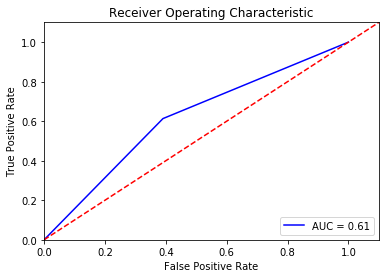

In [7]:
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
# Random Forest Classifier
model2 = RandomForestClassifier(n_estimators= 100,max_depth = 13)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print("Random Forest results")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred2))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred2))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred2))
print("Overall Mean Squred Error",mean_squared_error(y_test, y_pred2))


Random Forest results
Train Accuracy: 0.9671875
Test Accuracy: 0.6625
Confusion Matrix: 
[[274 133]
 [137 256]]
+ve Precision: 0.6580976863753213
-ve Precision: 0.6666666666666666
+ve Recall: 0.6513994910941476
-ve Recall: 0.6732186732186732
+ve F1 Score: 0.6547314578005116
-ve F1 Score: 0.6699266503667481


Sensitivity 0.6513994910941476
Specificity: 0.6732186732186732
Overall Precision Score:  0.6580976863753213
Overall Recall Score:  0.6513994910941476
Overall F1 Score:  0.6547314578005116
Overall Mean Squred Error 0.3375


Area under Curve: 0.6623090821564104


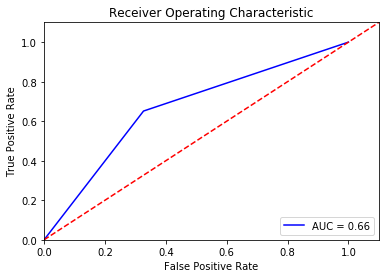

In [9]:
probs = model2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
# K nearest neighbour (KNN)
model3 = KNN(n_neighbors=9) 
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("K Nearest Neigbours Results")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred3))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred3))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred3))
print("Mean Squred Error",mean_squared_error(y_test, y_pred3))


K Nearest Neigbours Results
Train Accuracy: 0.7353125
Test Accuracy: 0.65625
Confusion Matrix: 
[[251 156]
 [119 274]]
+ve Precision: 0.6372093023255814
-ve Precision: 0.6783783783783783
+ve Recall: 0.6972010178117048
-ve Recall: 0.6167076167076168
+ve F1 Score: 0.6658566221142163
-ve F1 Score: 0.646074646074646


Sensitivity 0.6972010178117048
Specificity: 0.6167076167076168
Overall Precision Score:  0.6372093023255814
Overall Recall Score:  0.6972010178117048
Overall F1 Score:  0.6658566221142163
Mean Squred Error 0.34375


Area under Curve: 0.6569543172596607


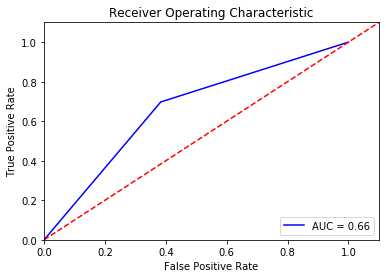

In [11]:
probs = model3.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred3)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
#SVM Classifier : Linear
model4 = svm.SVC(kernel='linear',probability=True)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)
print("SVM Linear kernel results")
print("Train Accuracy:",model4.score(x_train, y_train))
print("Test Accuracy:",model4.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred4))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred4))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred4))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred4))
print("Overall Mean Squred Error",mean_squared_error(y_test, y_pred4))


SVM Linear kernel results
Train Accuracy: 0.68
Test Accuracy: 0.6875
Confusion Matrix: 
[[272 135]
 [115 278]]
+ve Precision: 0.6731234866828087
-ve Precision: 0.7028423772609819
+ve Recall: 0.7073791348600509
-ve Recall: 0.6683046683046683
+ve F1 Score: 0.6898263027295285
-ve F1 Score: 0.6851385390428212


Sensitivity 0.7073791348600509
Specificity: 0.6683046683046683
Overall Precision Score:  0.6731234866828087
Overall Recall Score:  0.7073791348600509
Overall F1 Score:  0.6898263027295285
Overall Mean Squred Error 0.3125


Area under Curve: 0.6878419015823596


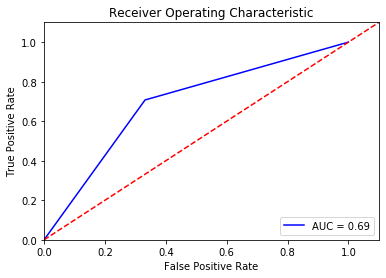

In [13]:
probs = model4.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
#SVM Classifier : Polynomial
model5 = svm.SVC(kernel='poly', degree = 3,probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print("SVM Polynomial kernel results")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred5))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred5))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred5))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred5))
print("Mean Squred Error",mean_squared_error(y_test, y_pred5))

SVM Polynomial kernel results
Train Accuracy: 0.7434375
Test Accuracy: 0.67
Confusion Matrix: 
[[254 153]
 [111 282]]
+ve Precision: 0.6025
-ve Precision: 0.62
+ve Recall: 0.6132315521628499
-ve Recall: 0.6093366093366094
+ve F1 Score: 0.6078184110970996
-ve F1 Score: 0.6146220570012392


Sensitivity 0.6132315521628499
Specificity: 0.6093366093366094
Overall Precision Score:  0.6482758620689655
Overall Recall Score:  0.7175572519083969
Overall F1 Score:  0.681159420289855
Mean Squred Error 0.33


Area under Curve: 0.6708179379935104


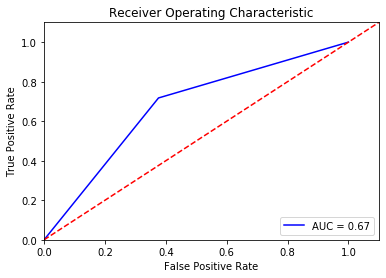

In [15]:
probs = model5.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred5)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
#SVM Classifier : Rbf
model6 = svm.SVC(kernel='rbf',probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print("SVM rbf kernel results")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred6))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred6).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred6))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred6))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred6))
print("Mean Squred Error",mean_squared_error(y_test, y_pred6))


SVM rbf kernel results
Train Accuracy: 0.741875
Test Accuracy: 0.705
Confusion Matrix: 
[[272 135]
 [101 292]]
+ve Precision: 0.6838407494145199
-ve Precision: 0.7292225201072386
+ve Recall: 0.7430025445292621
-ve Recall: 0.6683046683046683
+ve F1 Score: 0.7121951219512195
-ve F1 Score: 0.6974358974358975


Sensitivity 0.7430025445292621
Specificity: 0.6683046683046683
Overall Precision Score:  0.6838407494145199
Overall Recall Score:  0.7430025445292621
Overall F1 Score:  0.7121951219512195
Mean Squred Error 0.295


Area under Curve: 0.7056536064169652


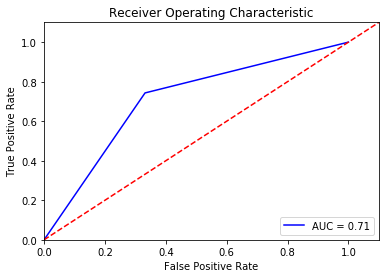

In [17]:
probs = model6.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred6)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [18]:
#Logistic Regression
model7 = LogisticRegression()
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print("Logistic Regression results")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred7))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred7).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred7))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred7))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred7))
print("Mean Squred Error",mean_squared_error(y_test, y_pred7))

Logistic Regression results
Train Accuracy: 0.6778125
Test Accuracy: 0.6825
Confusion Matrix: 
[[269 138]
 [116 277]]
+ve Precision: 0.6674698795180722
-ve Precision: 0.6987012987012987
+ve Recall: 0.7048346055979644
-ve Recall: 0.6609336609336609
+ve F1 Score: 0.6856435643564356
-ve F1 Score: 0.6792929292929293


Sensitivity 0.7048346055979644
Specificity: 0.6609336609336609
Overall Precision Score:  0.6674698795180722
Overall Recall Score:  0.7048346055979644
Overall F1 Score:  0.6856435643564356
Mean Squred Error 0.3175


Area under Curve: 0.6828841332658127


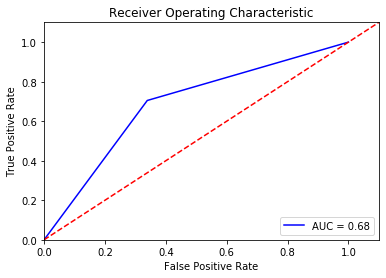

In [19]:
probs = model7.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred7)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
# XGBoost
model8 = XGBClassifier()
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
print("XG-Boost Classifier Results")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred8))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred8).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred8))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred8))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred8))
print("Mean Squred Error",mean_squared_error(y_test, y_pred8))

XG-Boost Classifier Results
Train Accuracy: 0.78625
Test Accuracy: 0.695
Confusion Matrix: 
[[294 113]
 [131 262]]
+ve Precision: 0.6986666666666667
-ve Precision: 0.691764705882353
+ve Recall: 0.6666666666666666
-ve Recall: 0.7223587223587223
+ve F1 Score: 0.6822916666666666
-ve F1 Score: 0.7067307692307693


Sensitivity 0.6666666666666666
Specificity: 0.7223587223587223
Overall Precision Score:  0.6986666666666667
Overall Recall Score:  0.6666666666666666
Overall F1 Score:  0.6822916666666666
Mean Squred Error 0.305


Area under Curve: 0.6945126945126945


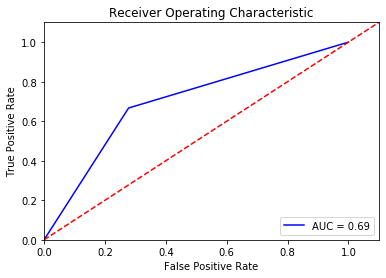

In [21]:
probs = model8.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred8)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
# Gaussian Naive Bayes
model9 = GaussianNB()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("XG-Boost Classifier Results")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred9))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred9).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred9))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred9))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred9))
print("Mean Squred Error",mean_squared_error(y_test, y_pred9))

XG-Boost Classifier Results
Train Accuracy: 0.6615625
Test Accuracy: 0.68625
Confusion Matrix: 
[[283 124]
 [127 266]]
+ve Precision: 0.6820512820512821
-ve Precision: 0.6902439024390243
+ve Recall: 0.6768447837150128
-ve Recall: 0.6953316953316954
+ve F1 Score: 0.6794380587484036
-ve F1 Score: 0.6927784577723378


Sensitivity 0.6768447837150128
Specificity: 0.6953316953316954
Overall Precision Score:  0.6820512820512821
Overall Recall Score:  0.6768447837150128
Overall F1 Score:  0.6794380587484036
Mean Squred Error 0.31375


Area under Curve: 0.6860882395233541


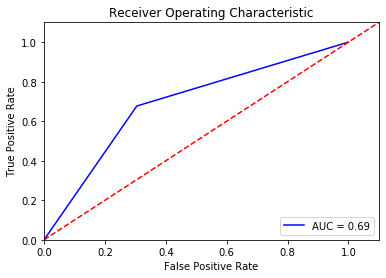

In [23]:
probs = model9.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred9)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Voting Classifier**

In [24]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(estimators=[ ('dt', model1), ('rf', model2), ('knn', model3),('svm_l', model4),
                                               ('svm_p', model5),('svm_r', model6),('lr',model7), ('XGB',model8), ('GNB', model9)],voting='soft')

In [25]:
voting_clf_soft.fit(x_train, y_train)
y_pred10 = voting_clf_soft.predict(x_test)
print("Soft Voting Classfier results")
print("Train Accuracy:",voting_clf_soft.score(x_train, y_train))
print("Test Accuracy:",voting_clf_soft.score(x_test, y_test))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred10))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred10).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y_test, y_pred10))
print("Overall Recall Score: ",metrics.recall_score(y_test, y_pred10))
print("Overall F1 Score: ",metrics.f1_score(y_test, y_pred10))
print("Mean Squred Error",mean_squared_error(y_test, y_pred10))

Soft Voting Classfier results
Train Accuracy: 0.838125
Test Accuracy: 0.6875
Confusion Matrix: 
[[271 136]
 [114 279]]
+ve Precision: 0.672289156626506
-ve Precision: 0.7038961038961039
+ve Recall: 0.7099236641221374
-ve Recall: 0.6658476658476659
+ve F1 Score: 0.6905940594059407
-ve F1 Score: 0.6843434343434344


Sensitivity 0.7099236641221374
Specificity: 0.6658476658476659
Overall Precision Score:  0.672289156626506
Overall Recall Score:  0.7099236641221374
Overall F1 Score:  0.6905940594059407
Mean Squred Error 0.3125


Area under Curve: 0.6878856649849016


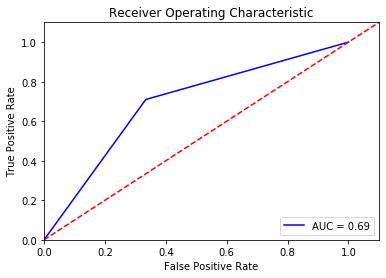

In [26]:
probs = voting_clf_soft.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred10)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Image Preprocessing for Testing**

In [30]:
test_folder1=r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Detection_of_drivable_road/Test_Positive"
test_folder2=r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Detection_of_drivable_road/Test_Negative"

In [ ]:
i=0
for filename in os.listdir(test_folder1):
    
    path=os.path.join(test_folder1,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

    #Histogram Equalization
    img3 = cv2.equalizeHist(img2)
    
    fname = r'/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Test_Positive/' + str(i) + '.jpg'
    cv2.imwrite(fname, img3)
    i+=1

In [31]:
i=0
for filename in os.listdir(test_folder2):
    
    path=os.path.join(test_folder2,filename)    
    img = cv2.imread(path, 0)
    
    #low pass filter to smoothen the image.....helps to remove noise
    kernel = np.ones((5,5),dtype = 'uint8')/9 
    img1 = cv2.filter2D(img,-1,kernel)
    
    #high pass filter to sharpen the image.....enhances the edges
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    img2 = cv2.filter2D(img1,-1,kernel)
    
    #gamma transformation to brighten the image
    img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

    img3 = cv2.equalizeHist(img2)
    
    fname = r'/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Test_Negative/' + str(i) + '.jpg'
    cv2.imwrite(fname, img3)
    i+=1

# **TESTING**

In [33]:
test_folder3 = r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Test_Positive"
test_folder4 = r"/content/drive/MyDrive/Colab Dataset/CV_Proj/Preprocessed_Data/Test_Negative"

In [34]:
#initialising i=0; as its the first class
i=0
k =0 
SIFT_data=[]
BRISK_data = []

with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_BRISK_Model.sav", "rb") as input_file:
        BRISK_kmeans = pickle.load(input_file)
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_SIFT_Model.sav", "rb") as input_file:
        SIFT_kmeans = pickle.load(input_file)
for filename in os.listdir(test_folder3):
    #path
    path=os.path.join(test_folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #SIFT feature extractor
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    # print("Descriptor Shape SIFT:",out.shape)

    array_double = np.array(out, dtype=np.double)
    
    a=SIFT_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    SIFT_data.append(hist[0]/len(keypoints))
    SIFT_Output = pd.DataFrame(SIFT_data)

    # BRISK feature extractor
    brisk = cv2.BRISK_create(thresh =70)
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    # print("Descriptor Shape BRISK:",out.shape)

    array_double = np.array(out, dtype=np.double)

    a=BRISK_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
    BRISK_data.append(hist[0]/len(keypoints))
    BRISK_Output = pd.DataFrame(BRISK_data)

    Output = pd.concat([SIFT_Output,BRISK_Output], axis=1)

    

#add row class 
Output["Class"] = i

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [35]:
csv_data=Output.to_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Test_pos2.csv', mode='a',header=False,index=False)

In [27]:
Output_pos = pd.read_csv(r'C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\Test_pos2.csv',header=None)
Output_pos

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.058423,0.013632,0.034080,0.057449,0.089581,0.026290,0.037975,0.063291,0.057449,0.064265,...,0.016807,0.043633,0.010989,0.041370,0.045572,0.040724,0.025856,0.054945,0.033937,0
1,0.069982,0.034991,0.049724,0.060773,0.044199,0.007366,0.012891,0.057090,0.073665,0.057090,...,0.046813,0.047377,0.034405,0.039481,0.037225,0.045685,0.049633,0.048505,0.022561,0
2,0.069307,0.028603,0.034103,0.039604,0.040704,0.008801,0.035204,0.049505,0.072607,0.055006,...,0.035122,0.037823,0.013508,0.049016,0.048244,0.038981,0.033192,0.037823,0.032034,0
3,0.055882,0.020588,0.049020,0.046078,0.068627,0.010784,0.025490,0.066667,0.052941,0.073529,...,0.040930,0.040930,0.027749,0.034686,0.041970,0.038848,0.036767,0.043011,0.027749,0
4,0.042484,0.026961,0.031046,0.058007,0.065359,0.024510,0.045752,0.060458,0.037582,0.066993,...,0.049823,0.046290,0.018375,0.038869,0.046643,0.042756,0.045583,0.042756,0.031802,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.020556,0.054414,0.049577,0.039903,0.041112,0.059250,0.091898,0.058041,0.024184,0.041112,...,0.079018,0.036839,0.039509,0.037373,0.038441,0.047517,0.048585,0.034170,0.028297,0
996,0.049374,0.012517,0.035466,0.052851,0.050070,0.025035,0.041029,0.066064,0.054242,0.054937,...,0.027817,0.044014,0.013380,0.039437,0.053169,0.041197,0.032394,0.040141,0.041197,0
997,0.048689,0.012484,0.037453,0.062422,0.067416,0.042447,0.047441,0.048689,0.051186,0.053683,...,0.031746,0.042517,0.030612,0.044785,0.044218,0.044785,0.030612,0.027778,0.035714,0
998,0.065471,0.026009,0.030493,0.047534,0.039462,0.051121,0.055605,0.037668,0.048430,0.043946,...,0.064855,0.035495,0.020158,0.044259,0.039877,0.041630,0.043383,0.035495,0.025416,0


In [37]:
#initialising i=1; as its the second class
i=1
SIFT_data=[]
BRISK_data = []
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_SIFT_Model.sav", "rb") as input_file:
        SIFT_kmeans = pickle.load(input_file)
with open(r"/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Kmeans_BRISK_Model.sav", "rb") as input_file:
        BRISK_kmeans = pickle.load(input_file)
for filename in os.listdir(test_folder4):
    #path
    path=os.path.join(test_folder4,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(280,430)
    img=cv2.resize(a,resize)
    
    #SIFT feature extractor
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    # print("Descriptor Shape SIFT:",out.shape)

    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
      array_double = np.zeros((1,128))
    a=SIFT_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
    if len(keypoints) == 0:
      for j in range(25):
        hist[0][j] = 0
      SIFT_data.append(hist[0])
    else:
      SIFT_data.append(hist[0]/len(keypoints))
    SIFT_Output2 = pd.DataFrame(SIFT_data)

    # BRISK feature extractor
    brisk = cv2.BRISK_create(thresh =70)
    keypoints, descriptors = brisk.detectAndCompute(img, None)
    out=pd.DataFrame(descriptors)
    # print("Descriptor Shape BRISK:",out.shape)

    array_double = np.array(out, dtype=np.double)
    if (array_double.shape[0]  == 0 or array_double.shape[1]  == 0):
      array_double = np.zeros((1,64))
    a=BRISK_kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
    if len(keypoints) == 0:
      for k in range(25):
        hist[0][k] = 0
      BRISK_data.append(hist[0])
    else:
      BRISK_data.append(hist[0]/len(keypoints))

    BRISK_Output2 = pd.DataFrame(BRISK_data)

    Output1 = pd.concat([SIFT_Output2,BRISK_Output2], axis=1)

#add row class 
Output1["Class"] = i

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [38]:
csv_data=Output1.to_csv(r'/content/drive/MyDrive/Colab Dataset/CV_Proj/New_Fusion/Test_neg2.csv', mode='a',header=False,index=False)

In [28]:
Output_neg = pd.read_csv(r'C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\Test_neg2.csv',header=None)
Output_neg

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.047861,0.023205,0.039884,0.039159,0.052937,0.025381,0.037708,0.058738,0.060914,0.046410,...,0.021256,0.048071,0.010137,0.040222,0.046436,0.042511,0.030412,0.041857,0.035317,1
1,0.047111,0.009778,0.032889,0.050667,0.071111,0.025778,0.063111,0.046222,0.051556,0.055111,...,0.026710,0.045603,0.008143,0.047231,0.046254,0.044625,0.032248,0.042020,0.043322,1
2,0.070451,0.023256,0.038304,0.036936,0.059508,0.013680,0.006156,0.064979,0.066347,0.046512,...,0.022444,0.052369,0.015960,0.043890,0.046135,0.043142,0.027681,0.055362,0.039152,1
3,0.056841,0.020489,0.035030,0.048909,0.056841,0.033708,0.027098,0.058163,0.057502,0.058163,...,0.025480,0.045612,0.006920,0.045297,0.050016,0.044039,0.036175,0.042152,0.032715,1
4,0.046989,0.019854,0.043680,0.039047,0.058901,0.037723,0.049636,0.049636,0.043680,0.052283,...,0.026948,0.048701,0.009740,0.045779,0.050000,0.047727,0.028896,0.050000,0.036364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.033030,0.029613,0.036446,0.051253,0.052392,0.078588,0.054670,0.033030,0.039863,0.045558,...,0.045455,0.038304,0.029111,0.037794,0.040858,0.047497,0.040858,0.039837,0.045455,1
996,0.037750,0.032357,0.040062,0.037750,0.065485,0.046995,0.072419,0.050847,0.026965,0.044684,...,0.040015,0.045999,0.019820,0.034031,0.040015,0.038893,0.044129,0.045251,0.030666,1
997,0.041541,0.014350,0.035498,0.054381,0.038520,0.073263,0.066465,0.035498,0.046828,0.052115,...,0.038865,0.053275,0.039738,0.031004,0.055022,0.048472,0.035808,0.040175,0.035808,1
998,0.039790,0.018769,0.036787,0.042793,0.059309,0.024775,0.065315,0.054054,0.036787,0.053303,...,0.029557,0.046798,0.017945,0.036242,0.055947,0.049965,0.043279,0.050669,0.033427,1


In [29]:
A=Output_pos.append(Output_neg)
x = A.iloc[:,0:48].values
y = A.iloc[:,48].values
x,y

(array([[0.05842259, 0.01363194, 0.03407984, ..., 0.0258565 , 0.05494505,
         0.03393665],
        [0.06998158, 0.03499079, 0.04972376, ..., 0.04963339, 0.04850536,
         0.02256063],
        [0.06930693, 0.02860286, 0.03410341, ..., 0.03319182, 0.03782323,
         0.03203396],
        ...,
        [0.04154079, 0.01435045, 0.03549849, ..., 0.03580786, 0.04017467,
         0.03580786],
        [0.03978979, 0.01876877, 0.03678679, ..., 0.04327938, 0.05066854,
         0.03342716],
        [0.03517186, 0.02717826, 0.03996803, ..., 0.04056162, 0.0549922 ,
         0.03783151]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [30]:
x_scaled = standard(x)

In [34]:
pca = pickle.load(open(r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\PCA_Model.pkl",'rb'))
pca1 = pca.transform(x_scaled)
x_reduced = pd.DataFrame(pca1)
x_reduced

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.0.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-2.045322,-3.046687,-1.515504,2.084179,-0.490922,-1.334109,0.303992,1.067217,1.225745,0.556570,...,0.415927,-0.470051,0.007806,-0.135872,0.042936,-0.455511,0.301190,-0.069686,0.061438,0.210452
1,-4.342459,3.533593,1.538944,0.002914,-0.922790,-0.361919,0.061744,0.146703,-0.971239,-1.166022,...,0.161668,-0.684180,0.407980,-0.469795,0.543029,-0.180760,0.902862,0.108607,-0.062530,-0.205900
2,-4.865855,0.235336,1.413166,0.392704,0.733412,0.919845,-0.633009,-0.291696,-0.460248,-1.025404,...,-0.201814,0.196852,-0.056777,-0.154057,0.460611,-0.301474,-0.141070,0.218525,0.221101,-0.281627
3,-2.743751,1.964783,-1.641862,0.802196,-0.143720,-0.406112,-0.160200,0.607393,0.795022,0.704077,...,-0.176546,0.101940,-0.157161,0.097525,0.377932,-0.229139,0.378270,0.228905,0.126496,0.051660
4,-0.227139,1.806226,-1.879782,1.457420,0.693425,-0.922824,-0.454451,-0.142428,0.510611,-0.401123,...,0.033467,0.358085,0.416006,-0.227710,-0.012014,-0.622472,-0.116158,0.254547,-0.226898,-0.157337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.148238,-1.224524,0.137695,-1.064742,-2.803803,-0.248758,0.289294,0.287570,-0.257903,-0.607690,...,0.546985,0.191680,-0.332611,0.139190,0.307281,-0.006088,-0.286975,0.536757,-0.645931,0.621254
1996,3.637231,0.213849,-0.786205,1.736861,-0.352479,0.987858,-0.326776,-0.599317,-0.036407,0.783275,...,-0.285526,-0.145721,-0.307760,0.242619,0.168632,-0.073503,0.053285,-0.459990,-0.278041,0.312049
1997,4.771618,-1.516660,0.372532,-0.907320,-0.500977,1.374415,-0.039382,0.636636,0.454254,-0.340003,...,-0.033574,0.119176,-0.142650,-0.421879,-0.592262,-0.290890,0.046611,0.228154,0.152122,-0.237425
1998,0.960910,0.801177,-1.757370,2.517508,-0.135866,1.731829,-0.856286,-0.600742,-0.389446,0.305347,...,0.241083,0.072064,-0.085977,-0.046169,0.268587,0.181578,0.037830,-0.152663,0.135057,-0.173910


In [35]:
B=pd.concat([x_reduced, pd.DataFrame(y)],axis=1)
data = B
data

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,0
0,-2.045322,-3.046687,-1.515504,2.084179,-0.490922,-1.334109,0.303992,1.067217,1.225745,0.556570,...,-0.470051,0.007806,-0.135872,0.042936,-0.455511,0.301190,-0.069686,0.061438,0.210452,0
1,-4.342459,3.533593,1.538944,0.002914,-0.922790,-0.361919,0.061744,0.146703,-0.971239,-1.166022,...,-0.684180,0.407980,-0.469795,0.543029,-0.180760,0.902862,0.108607,-0.062530,-0.205900,0
2,-4.865855,0.235336,1.413166,0.392704,0.733412,0.919845,-0.633009,-0.291696,-0.460248,-1.025404,...,0.196852,-0.056777,-0.154057,0.460611,-0.301474,-0.141070,0.218525,0.221101,-0.281627,0
3,-2.743751,1.964783,-1.641862,0.802196,-0.143720,-0.406112,-0.160200,0.607393,0.795022,0.704077,...,0.101940,-0.157161,0.097525,0.377932,-0.229139,0.378270,0.228905,0.126496,0.051660,0
4,-0.227139,1.806226,-1.879782,1.457420,0.693425,-0.922824,-0.454451,-0.142428,0.510611,-0.401123,...,0.358085,0.416006,-0.227710,-0.012014,-0.622472,-0.116158,0.254547,-0.226898,-0.157337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.148238,-1.224524,0.137695,-1.064742,-2.803803,-0.248758,0.289294,0.287570,-0.257903,-0.607690,...,0.191680,-0.332611,0.139190,0.307281,-0.006088,-0.286975,0.536757,-0.645931,0.621254,1
1996,3.637231,0.213849,-0.786205,1.736861,-0.352479,0.987858,-0.326776,-0.599317,-0.036407,0.783275,...,-0.145721,-0.307760,0.242619,0.168632,-0.073503,0.053285,-0.459990,-0.278041,0.312049,1
1997,4.771618,-1.516660,0.372532,-0.907320,-0.500977,1.374415,-0.039382,0.636636,0.454254,-0.340003,...,0.119176,-0.142650,-0.421879,-0.592262,-0.290890,0.046611,0.228154,0.152122,-0.237425,1
1998,0.960910,0.801177,-1.757370,2.517508,-0.135866,1.731829,-0.856286,-0.600742,-0.389446,0.305347,...,0.072064,-0.085977,-0.046169,0.268587,0.181578,0.037830,-0.152663,0.135057,-0.173910,1


In [36]:
x = data.iloc[:,0:42].values
y = data.iloc[:,42]

In [37]:
x,y

(array([[-2.04532162, -3.04668659, -1.51550417, ..., -0.0696861 ,
          0.06143789,  0.21045185],
        [-4.34245885,  3.5335928 ,  1.53894376, ...,  0.10860724,
         -0.06252951, -0.20590024],
        [-4.86585488,  0.23533632,  1.41316594, ...,  0.21852534,
          0.22110136, -0.28162727],
        ...,
        [ 4.77161805, -1.51666015,  0.37253228, ...,  0.22815446,
          0.15212217, -0.23742508],
        [ 0.96091039,  0.80117677, -1.75737045, ..., -0.15266315,
          0.13505656, -0.17390981],
        [ 3.74794429,  0.14533399, -0.93492756, ..., -0.27085547,
         -0.33717723,  0.4137062 ]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1995    1
 1996    1
 1997    1
 1998    1
 1999    1
 Name: 0, Length: 2000, dtype: int64)

# **Decision Tree Testing results**

In [38]:
test_y_pred1 = model1.predict(x)
print("Decision Tree Test Results")
print("Test Accuracy:",model1.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred1))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred1).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred1))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred1))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred1))
print("Mean Squred Error",mean_squared_error(y, test_y_pred1))

Decision Tree Test Results
Test Accuracy: 0.616
Confusion Matrix: 
[[536 464]
 [304 696]]
+ve Precision: 0.6
-ve Precision: 0.638095238095238
+ve Recall: 0.696
-ve Recall: 0.536
+ve F1 Score: 0.6444444444444445
-ve F1 Score: 0.5826086956521739


Sensitivity 0.696
Specificity: 0.536
Overall Precision Score:  0.6
Overall Recall Score:  0.696
Overall F1 Score:  0.6444444444444445
Mean Squred Error 0.384


Area under Curve: 0.616


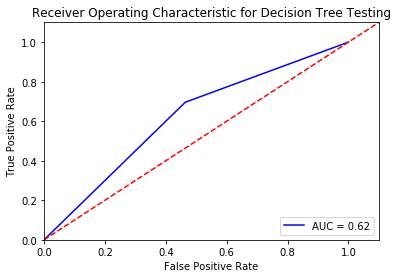

In [39]:
probs = model1.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred1)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Decision Tree Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Random Forest Testing results**

In [40]:
test_y_pred2 = model2.predict(x)
print("Random Forest Test Results")
print("Test Accuracy:",model2.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred2))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred2).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred2))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred2))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred2))
print("Mean Squred Error",mean_squared_error(y, test_y_pred2))

Random Forest Test Results
Test Accuracy: 0.704
Confusion Matrix: 
[[559 441]
 [151 849]]
+ve Precision: 0.6581395348837209
-ve Precision: 0.7873239436619718
+ve Recall: 0.849
-ve Recall: 0.559
+ve F1 Score: 0.7414847161572052
-ve F1 Score: 0.6538011695906433


Sensitivity 0.849
Specificity: 0.559
Overall Precision Score:  0.6581395348837209
Overall Recall Score:  0.849
Overall F1 Score:  0.7414847161572052
Mean Squred Error 0.296


Area under Curve: 0.704


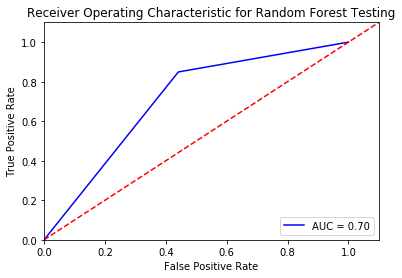

In [41]:
probs = model2.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred2)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Random Forest Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **KNN Testing results**

In [42]:
test_y_pred3 = model3.predict(x)
print("KNN Testing Results")
print("Test Accuracy:",model3.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred3))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred3).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred3))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred3))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred3))
print("Mean Squred Error",mean_squared_error(y, test_y_pred3))

KNN Testing Results
Test Accuracy: 0.6705
Confusion Matrix: 
[[529 471]
 [188 812]]
+ve Precision: 0.6328916601714731
-ve Precision: 0.7377963737796374
+ve Recall: 0.812
-ve Recall: 0.529
+ve F1 Score: 0.7113447218572054
-ve F1 Score: 0.6161910308677928


Sensitivity 0.812
Specificity: 0.529
Overall Precision Score:  0.6328916601714731
Overall Recall Score:  0.812
Overall F1 Score:  0.7113447218572054
Mean Squred Error 0.3295


Area under Curve: 0.6705000000000001


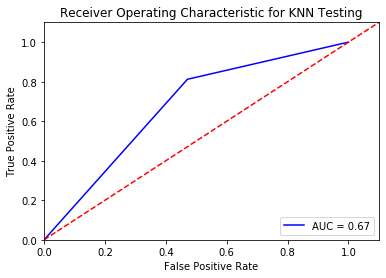

In [43]:
probs = model3.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred3)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for KNN Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SVM Linear Testing Results**




In [44]:
test_y_pred4 = model4.predict(x)
print("SVM Linear Testing Results")
print("Test Accuracy:",model4.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred4))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred4).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred4))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred4))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred4))
print("Mean Squred Error",mean_squared_error(y, test_y_pred4))

SVM Linear Testing Results
Test Accuracy: 0.679
Confusion Matrix: 
[[513 487]
 [155 845]]
+ve Precision: 0.6343843843843844
-ve Precision: 0.7679640718562875
+ve Recall: 0.845
-ve Recall: 0.513
+ve F1 Score: 0.7246998284734134
-ve F1 Score: 0.6151079136690647


Sensitivity 0.845
Specificity: 0.513
Overall Precision Score:  0.6343843843843844
Overall Recall Score:  0.845
Overall F1 Score:  0.7246998284734134
Mean Squred Error 0.321


Area under Curve: 0.679


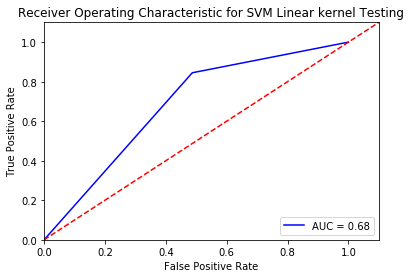

In [45]:
probs = model4.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred4)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SVM Linear kernel Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#**SVM Polynomial Testing results**




In [46]:
test_y_pred5 = model5.predict(x)
print("SVM Polynomial kernel Testing Results")
print("Test Accuracy:",model5.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred5))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred5).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred5))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred5))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred5))
print("Mean Squred Error",mean_squared_error(y, test_y_pred5))

SVM Polynomial kernel Testing Results
Test Accuracy: 0.6835
Confusion Matrix: 
[[502 498]
 [135 865]]
+ve Precision: 0.6346294937637564
-ve Precision: 0.7880690737833596
+ve Recall: 0.865
-ve Recall: 0.502
+ve F1 Score: 0.7321201862039779
-ve F1 Score: 0.6133170433720221


Sensitivity 0.865
Specificity: 0.502
Overall Precision Score:  0.6346294937637564
Overall Recall Score:  0.865
Overall F1 Score:  0.7321201862039779
Mean Squred Error 0.3165


Area under Curve: 0.6835


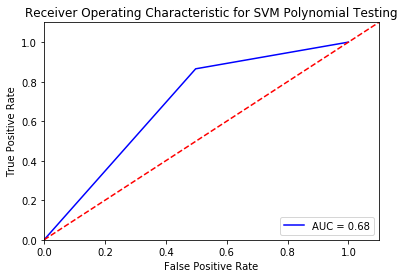

In [47]:
probs = model5.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred5)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SVM Polynomial Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **SVM Rbf Testing results**





In [48]:
test_y_pred6 = model6.predict(x)
print("SVM Rbf kernel Testing Results")
print("Test Accuracy:",model6.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred6))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred6).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred6))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred6))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred6))
print("Mean Squred Error",mean_squared_error(y, test_y_pred6))

SVM Rbf kernel Testing Results
Test Accuracy: 0.709
Confusion Matrix: 
[[542 458]
 [124 876]]
+ve Precision: 0.656671664167916
-ve Precision: 0.8138138138138138
+ve Recall: 0.876
-ve Recall: 0.542
+ve F1 Score: 0.7506426735218509
-ve F1 Score: 0.6506602641056423


Sensitivity 0.876
Specificity: 0.542
Overall Precision Score:  0.656671664167916
Overall Recall Score:  0.876
Overall F1 Score:  0.7506426735218509
Mean Squred Error 0.291


Area under Curve: 0.709


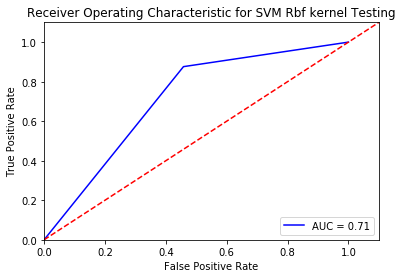

In [49]:
probs = model6.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred6)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for SVM Rbf kernel Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Logistic Regression Testing results**

In [50]:
test_y_pred7 = model7.predict(x)
print("Logistic Regression Testing Results")
print("Test Accuracy:",model7.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred7))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred7).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred7))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred7))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred7))
print("Mean Squred Error",mean_squared_error(y, test_y_pred7))

Logistic Regression Testing Results
Test Accuracy: 0.688
Confusion Matrix: 
[[537 463]
 [161 839]]
+ve Precision: 0.6443932411674347
-ve Precision: 0.7693409742120344
+ve Recall: 0.839
-ve Recall: 0.537
+ve F1 Score: 0.728931364031277
-ve F1 Score: 0.6325088339222615


Sensitivity 0.839
Specificity: 0.537
Overall Precision Score:  0.6443932411674347
Overall Recall Score:  0.839
Overall F1 Score:  0.728931364031277
Mean Squred Error 0.312


Area under Curve: 0.688


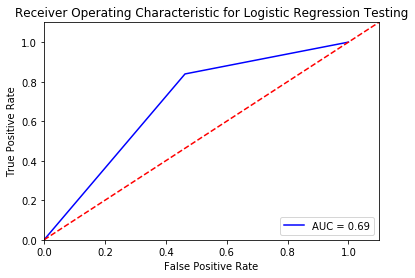

In [51]:
probs = model7.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred7)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Logistic Regression Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **XG Boost Testing results**

In [52]:
test_y_pred8 = model8.predict(x)
print("XG-Boost Classifier Results")
print("Test Accuracy:",model8.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred8))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred8).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred8))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred8))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred8))
print("Mean Squred Error",mean_squared_error(y, test_y_pred8))

XG-Boost Classifier Results
Test Accuracy: 0.69
Confusion Matrix: 
[[576 424]
 [196 804]]
+ve Precision: 0.6547231270358306
-ve Precision: 0.7461139896373057
+ve Recall: 0.804
-ve Recall: 0.576
+ve F1 Score: 0.7217235188509874
-ve F1 Score: 0.6501128668171557


Sensitivity 0.804
Specificity: 0.576
Overall Precision Score:  0.6547231270358306
Overall Recall Score:  0.804
Overall F1 Score:  0.7217235188509874
Mean Squred Error 0.31


Area under Curve: 0.6900000000000002


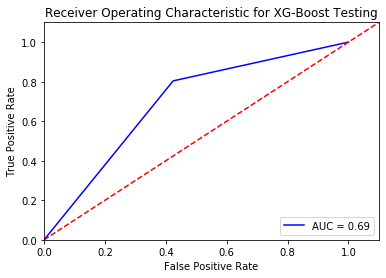

In [53]:
probs = model8.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred8)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for XG-Boost Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **Naive Bayes Testing Results**

In [54]:
test_y_pred9 = model9.predict(x)
print("Naive Bayes Test Results")
print("Test Accuracy:",model9.score(x,y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred9))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred9).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred9))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred9))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred9))
print("Mean Squred Error",mean_squared_error(y, test_y_pred9))

Naive Bayes Test Results
Test Accuracy: 0.66
Confusion Matrix: 
[[499 501]
 [179 821]]
+ve Precision: 0.6210287443267776
-ve Precision: 0.7359882005899705
+ve Recall: 0.821
-ve Recall: 0.499
+ve F1 Score: 0.7071490094745907
-ve F1 Score: 0.5947556615017879


Sensitivity 0.821
Specificity: 0.499
Overall Precision Score:  0.6210287443267776
Overall Recall Score:  0.821
Overall F1 Score:  0.7071490094745907
Mean Squred Error 0.34


Area under Curve: 0.66


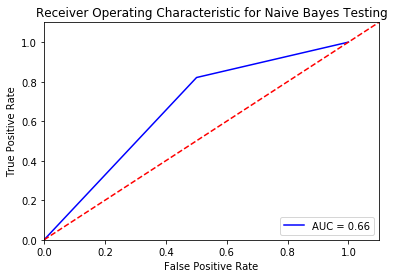

In [55]:
probs = model9.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred9)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Naive Bayes Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#**Voting Classifier**

In [64]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier(estimators=[ ('dt', model1), ('rf', model2), ('knn', model3),('svm_l', model4),
                                               ('svm_p', model5),('svm_r', model6),('lr',model7), ('XGB',model8), ('GNB', model9)],voting='soft')

In [56]:
test_y_pred10 = voting_clf_soft.predict(x)
print("Soft Voting Classfier results")
print("Test Accuracy:",voting_clf_soft.score(x, y))
print("Confusion Matrix: ")
print(confusion_matrix(y, test_y_pred10))

tn, fp, fn, tp = confusion_matrix(y, test_y_pred10).ravel()
pos_precision = tp/(tp+fp)
neg_precision = tn/(tn+fn)
pos_recall = tp/(tp+fn)
neg_recall = tn/(tn+fp)
pos_f1 = (2*pos_precision*pos_recall)/(pos_precision+pos_recall)
neg_f1 = (2*neg_precision*neg_recall)/(neg_precision+neg_recall)

print('+ve Precision:', pos_precision)
print('-ve Precision:', neg_precision)
print('+ve Recall:', pos_recall)
print('-ve Recall:', neg_recall)
print('+ve F1 Score:', pos_f1)
print('-ve F1 Score:', neg_f1)
print('\n')
print('Sensitivity', tp/(tp+fn))
print('Specificity:', tn/(tn+fp))

print("Overall Precision Score: ",metrics.precision_score(y, test_y_pred10))
print("Overall Recall Score: ",metrics.recall_score(y, test_y_pred10))
print("Overall F1 Score: ",metrics.f1_score(y, test_y_pred10))
print("Mean Squred Error",mean_squared_error(y, test_y_pred10))

Soft Voting Classfier results
Test Accuracy: 0.702
Confusion Matrix: 
[[547 453]
 [143 857]]
+ve Precision: 0.6541984732824427
-ve Precision: 0.7927536231884058
+ve Recall: 0.857
-ve Recall: 0.547
+ve F1 Score: 0.7419913419913419
-ve F1 Score: 0.647337278106509


Sensitivity 0.857
Specificity: 0.547
Overall Precision Score:  0.6541984732824427
Overall Recall Score:  0.857
Overall F1 Score:  0.7419913419913419
Mean Squred Error 0.298


Area under Curve: 0.7019999999999998


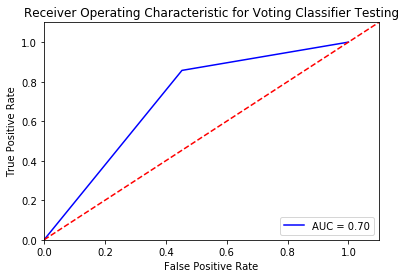

In [57]:
probs = voting_clf_soft.predict_proba(x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y, test_y_pred10)
roc_auc = metrics.auc(fpr, tpr)
print('Area under Curve:', roc_auc)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for Voting Classifier Testing')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1.1], [0, 1.1],'r--')
plt.xlim([0, 1.1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# **Individual Image prediction**


# **Positive Image**

In [116]:
import pickle 

SIFT_data=[]
BRISK_data = []
path=r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Validation\1245.jpg"

#Image Preprocessing
a=cv2.imread(path, 0)
resize=(280,430)
img=cv2.resize(a,resize)

kernel = np.ones((3,3),dtype = 'uint8')/9 #low pass filter
img1 = cv2.filter2D(img,-1,kernel)
    
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) #high pass filter
img2 = cv2.filter2D(img1,-1,kernel)
    
img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8') #gamma transformation

#Histogram Equalization
img3 = cv2.equalizeHist(img2)

#SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img2, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape SIFT:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\Kmeans_SIFT_Model.sav", "rb") as input_file:
    SIFT_kmeans = pickle.load(input_file)
    
a=SIFT_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
SIFT_data.append(hist[0]/len(keypoints))
SIFT_Output = pd.DataFrame(SIFT_data)

# BRISK feature extractor
brisk = cv2.BRISK_create()
keypoints, descriptors = brisk.detectAndCompute(img, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape BRISK:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\Kmeans_BRISK_Model.sav", "rb") as input_file:
    BRISK_kmeans = pickle.load(input_file)
    
a=BRISK_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
BRISK_data.append(hist[0]/len(keypoints))
BRISK_Output = pd.DataFrame(BRISK_data)

Output = pd.concat([SIFT_Output,BRISK_Output], axis=1)

Output = Output.iloc[:,0:48].values
print("Histogram:\n",Output)

sf = standard(Output)
pca1 = pca.transform(sf)
y_pred1 = voting_clf_soft.predict(pca1)
print('Predicted Class:', y_pred1)
if (y_pred1 == 1):
  print("The road is non-drivable")
else:
  print("The road is drivable")

Descriptor Shape SIFT: (1484, 128)


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Descriptor Shape BRISK: (222, 64)
Histogram:
 [[0.01886792 0.01415094 0.02425876 0.03571429 0.04312668 0.07479784
  0.07210243 0.02830189 0.01212938 0.03167116 0.01819407 0.03975741
  0.08423181 0.0296496  0.04380054 0.01954178 0.03167116 0.08490566
  0.09231806 0.10242588 0.04784367 0.02425876 0.02628032 0.05405405
  0.01351351 0.13963964 0.01351351 0.03153153 0.03603604 0.05405405
  0.03153153 0.05855856 0.07207207 0.06306306 0.00900901 0.00900901
  0.03153153 0.00900901 0.01801802 0.03153153 0.01351351 0.02252252
  0.01801802 0.0990991  0.02252252 0.08558559 0.04054054 0.02252252]]
Predicted Class: [0]
The road is drivable


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# **Negative Image**

In [117]:
import pickle 

SIFT_data=[]
BRISK_data = []
path=r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Validation\70.jpg"

#Image Preprocessing
a=cv2.imread(path, 0)
resize=(280,430)
img=cv2.resize(a,resize)

kernel = np.ones((3,3),dtype = 'uint8')/9 #low pass filter
img1 = cv2.filter2D(img,-1,kernel)
    
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) #high pass filter
img2 = cv2.filter2D(img1,-1,kernel)
    
img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8') #gamma transformation

#Histogram Equalization
img3 = cv2.equalizeHist(img2)

#SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img2, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape SIFT:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\Kmeans_SIFT_Model.sav", "rb") as input_file:
    SIFT_kmeans = pickle.load(input_file)
    
a=SIFT_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
SIFT_data.append(hist[0]/len(keypoints))
SIFT_Output = pd.DataFrame(SIFT_data)

# BRISK feature extractor
brisk = cv2.BRISK_create()
keypoints, descriptors = brisk.detectAndCompute(img, None)
out=pd.DataFrame(descriptors)
print("Descriptor Shape BRISK:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\Kmeans_BRISK_Model.sav", "rb") as input_file:
    BRISK_kmeans = pickle.load(input_file)
    
a=BRISK_kmeans.predict(array_double)
hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
BRISK_data.append(hist[0]/len(keypoints))
BRISK_Output = pd.DataFrame(BRISK_data)

Output = pd.concat([SIFT_Output,BRISK_Output], axis=1)

Output = Output.iloc[:,0:48].values
print("Histogram:\n",Output)

sf = standard(Output)
pca1 = pca.transform(sf)
y_pred1 = model6.predict(pca1)
print('Predicted Class:', y_pred1)
if (y_pred1 == 1):
  print("The road is non drivable")
else:
  print("The road is drivable")

Descriptor Shape SIFT: (2312, 128)


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Descriptor Shape BRISK: (808, 64)
Histogram:
 [[0.01730104 0.00908304 0.01773356 0.04628028 0.05363322 0.05795848
  0.10423875 0.03546713 0.01600346 0.03719723 0.03416955 0.04282007
  0.06055363 0.04368512 0.07309689 0.01859862 0.0350346  0.06574394
  0.07136678 0.07569204 0.02681661 0.03243945 0.02508651 0.10148515
  0.01113861 0.0470297  0.02846535 0.02970297 0.0259901  0.05321782
  0.03217822 0.06311881 0.03960396 0.06064356 0.0470297  0.02722772
  0.02970297 0.03094059 0.03712871 0.0259901  0.02722772 0.02846535
  0.03341584 0.07425743 0.0259901  0.02722772 0.06435644 0.02846535]]
Predicted Class: [1]
The road is non drivable


C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KMeans from version 0.24.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
print("The road is non -drivable")
  tts = gTTS(text ="The road is non -drivable", lang = "en")
  tts.save('/content/a.wav')
  Audio('/content/a.wav', autoplay = True)

  tts_obj = gTTS(text = "The road is drivable", lang = "en")
  tts_obj.save('/content/2.wav')
  Audio('/content/2.wav', autoplay = True)

In [33]:
import pickle

In [ ]:
pca = pickle.load(open("C:\Users\Rahul\Documents\AMITESH\Detection_of_drivable_road\Model_files\PCA_Model.pkl",'rb'))